# Using k-Means on the Mpg Dataset

In [2]:
# Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans

In [3]:
#Data
Mpg = sns.load_dataset('mpg')

## Explore and Wrangle the Data

In [4]:
Mpg.info()   # The last two are objects, so they cannot be included. Are float64 Dtypes okay??

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [5]:
Mpg.head()  # Looking at what the origin and name were. Look like they could be useful,
# if we needed an identifier for each row. Going to drop it. 

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


### Change number columns to int64

In [ ]:
Mpg['mpg']=Mpg

### Drop columns

In [6]:
MpgTrimmed = Mpg.drop(['origin', 'name'], axis=1)

In [7]:
MpgTrimmed.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


### Looking for and dropping NA

In [9]:
MpgTrimmed.isna().sum()  # horsepower has 6

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
dtype: int64

In [25]:
MpgTrimmed.dropna(inplace = True)
# still have 392 of 398 rows

In [26]:
MpgTrimmed.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
dtype: int64

### Change all number columns to int in our new dataframe

In [27]:
#### The next few lines of code was all because I forgot to add "inplace = True" after dropping the na's earlier. 
#### but I wanted to keep it in here for the same of rembering
ds = MpgTrimmed.isin([np.inf, -np.inf])

In [28]:
print(ds)

       mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    False      False         False       False   False         False   
1    False      False         False       False   False         False   
2    False      False         False       False   False         False   
3    False      False         False       False   False         False   
4    False      False         False       False   False         False   
..     ...        ...           ...         ...     ...           ...   
393  False      False         False       False   False         False   
394  False      False         False       False   False         False   
395  False      False         False       False   False         False   
396  False      False         False       False   False         False   
397  False      False         False       False   False         False   

     model_year  
0         False  
1         False  
2         False  
3         False  
4         False  
..          ...

In [29]:
pd.DataFrame(ds)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
393,False,False,False,False,False,False,False
394,False,False,False,False,False,False,False
395,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False


In [30]:
MpgTrimmed.replace([np.inf, -np.inf], np.nan, inplace=True)

In [31]:
MpgTrimmed.dropna() 

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18,8,307,130.0,3504,12.0,70
1,15,8,350,165.0,3693,11.5,70
2,18,8,318,150.0,3436,11.0,70
3,16,8,304,150.0,3433,12.0,70
4,17,8,302,140.0,3449,10.5,70
...,...,...,...,...,...,...,...
393,27,4,140,86.0,2790,15.6,82
394,44,4,97,52.0,2130,24.6,82
395,32,4,135,84.0,2295,11.6,82
396,28,4,120,79.0,2625,18.6,82


In [32]:
MpgTrimmed['mpg']=MpgTrimmed['mpg'].astype(int)
MpgTrimmed['displacement']=MpgTrimmed['displacement'].astype(int)
MpgTrimmed['horsepower']=MpgTrimmed['horsepower'].astype(int)
MpgTrimmed['acceleration']=MpgTrimmed['acceleration'].astype(int)

In [33]:
MpgTrimmed.info()   #It worked!

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   mpg           392 non-null    int64
 1   cylinders     392 non-null    int64
 2   displacement  392 non-null    int64
 3   horsepower    392 non-null    int64
 4   weight        392 non-null    int64
 5   acceleration  392 non-null    int64
 6   model_year    392 non-null    int64
dtypes: int64(7)
memory usage: 24.5 KB


# k-Means Analysis
## Testing 2 clusters

In [34]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(MpgTrimmed)

/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

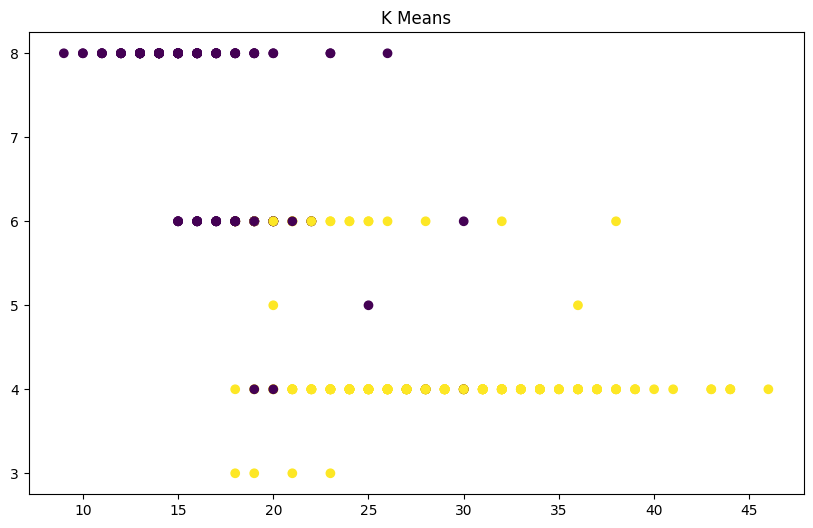

In [35]:
plt.figure(figsize=(10,6))
plt.title('K Means')
plt.scatter(MpgTrimmed['mpg'], MpgTrimmed['cylinders'], c=kmeans.labels_, cmap='viridis')

# Makes sense that the lower mpg, the more cylinders there are

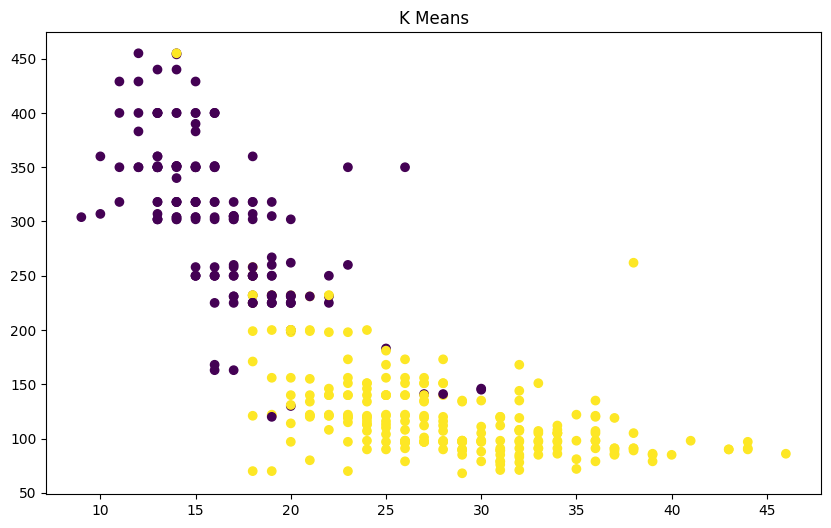

In [36]:
plt.figure(figsize=(10,6))
plt.title('K Means')
plt.scatter(MpgTrimmed['mpg'], MpgTrimmed['displacement'], c=kmeans.labels_, cmap='viridis')

# The two colors are really closely separated. If I knew what displacement meant, I would comment on it. 

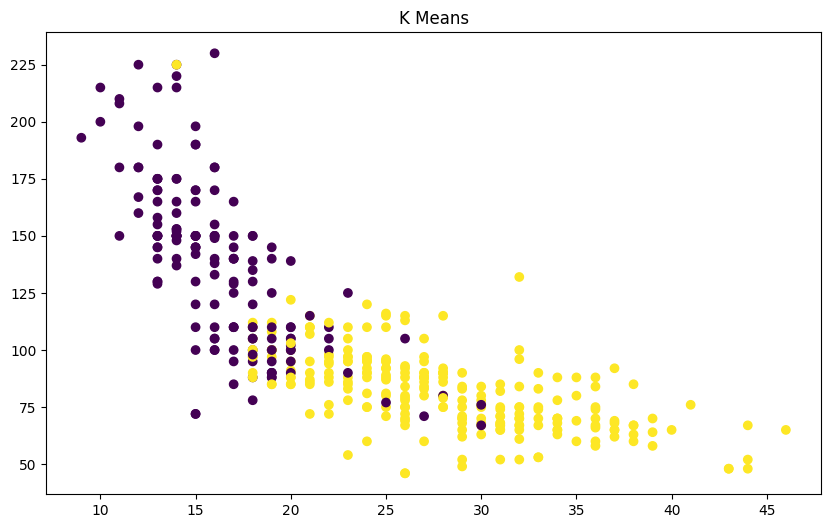

In [37]:
plt.figure(figsize=(10,6))
plt.title('K Means')
plt.scatter(MpgTrimmed['mpg'], MpgTrimmed['horsepower'], c=kmeans.labels_, cmap='viridis')

# Also a fairly nice split, with more mixing between the yellow and purple clusters. 
# Makes sense that the higher the horsepower, the lower the mpg

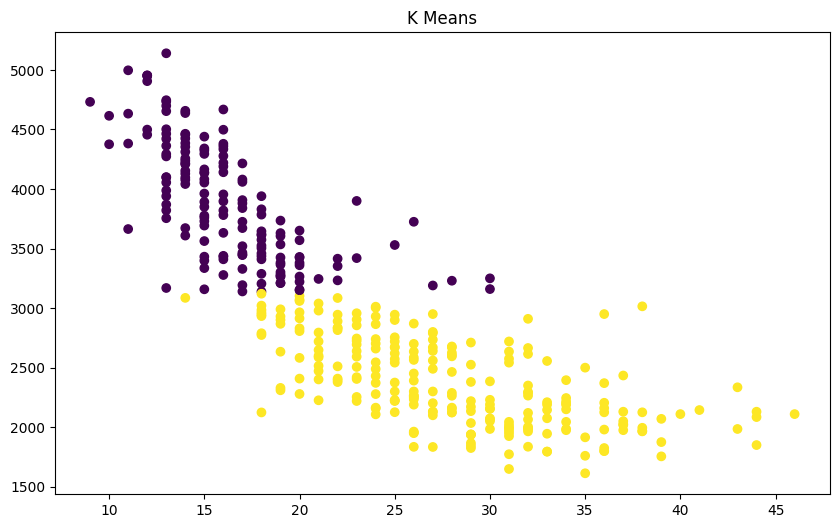

In [38]:
plt.figure(figsize=(10,6))
plt.title('K Means')
plt.scatter(MpgTrimmed['mpg'], MpgTrimmed['weight'], c=kmeans.labels_, cmap='viridis')

# Also a nice split between the data
# Makes sense because the heavier the car, the lower the mpg

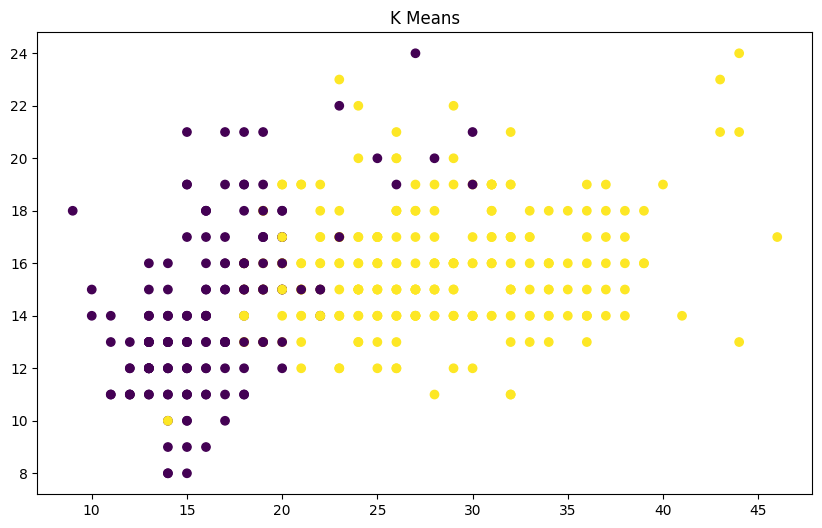

In [39]:
plt.figure(figsize=(10,6))
plt.title('K Means')
plt.scatter(MpgTrimmed['mpg'], MpgTrimmed['acceleration'], c=kmeans.labels_, cmap='viridis')
# A little more mixing than others, but not too bad. 
# Makes sense because the lower the acceleration, the lower the mpg, which kind of splits at an mpg of 20

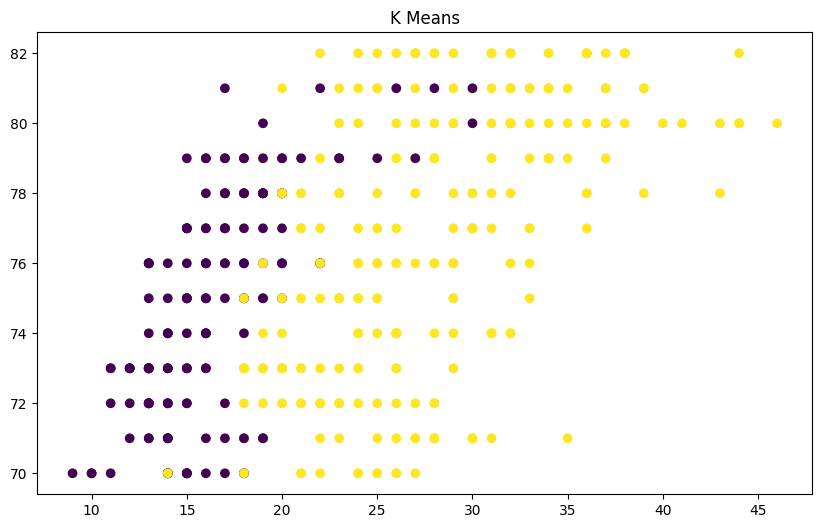

In [41]:
plt.figure(figsize=(10,6))
plt.title('K Means')
plt.scatter(MpgTrimmed['mpg'], MpgTrimmed['model_year'], c=kmeans.labels_, cmap='viridis')
# slightly more overlap than others, but not too bad
# Makes sense because the older cars have worse mpg. 

## Add labels to the dataset

In [42]:
MpgTrimmed['Category'] = kmeans.labels_

In [43]:
MpgTrimmed.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,Category
0,18,8,307,130,3504,12,70,0
1,15,8,350,165,3693,11,70,0
2,18,8,318,150,3436,11,70,0
3,16,8,304,150,3433,12,70,0
4,17,8,302,140,3449,10,70,0


In [48]:
MpgTrimmed.groupby('Category').mean()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
Category,,,,,,,
0,16.314103,7.237179,301.653846,137.564103,3879.532051,14.237179,74.762821
1,27.889831,4.305085,123.521186,82.593220,2381.381356,15.813559,76.783898


## Testing 3 Clusters

In [49]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(MpgTrimmed)

/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [50]:
MpgTrimmed['Group'] = kmeans.labels_

MpgTrimmed.groupby('Group').mean()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,Category
Group,,,,,,,,
0,20.590164,5.819672,212.614754,105.401639,3162.581967,15.516393,76.352459,0.459016
1,14.533333,7.866667,344.144444,157.811111,4236.322222,13.200000,74.011111,0.000000
2,29.483333,4.038889,107.205556,77.166667,2222.827778,15.955556,76.711111,1.000000


## Testing 4 clusters

In [51]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(MpgTrimmed)

/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

## Investigate Means by Category

In [45]:
MpgTrimmed.groupby('mpg')['cylinders'].mean()

mpg
9     8.000000
10    8.000000
11    8.000000
12    8.000000
13    8.000000
14    8.000000
15    7.619048
16    7.222222
17    7.066667
18    6.208333
19    5.950000
20    5.750000
21    4.750000
22    5.076923
23    4.733333
24    4.266667
25    4.312500
26    4.315789
27    4.000000
28    4.153846
29    4.000000
30    4.181818
31    4.000000
32    4.142857
33    4.000000
34    4.000000
35    4.000000
36    4.111111
37    4.000000
38    4.400000
39    4.000000
40    4.000000
41    4.000000
43    4.000000
44    4.000000
46    4.000000
Name: cylinders, dtype: float64

In [46]:
MpgTrimmed.groupby('mpg')['displacement'].mean()

mpg
9     304.000000
10    333.500000
11    374.250000
12    394.500000
13    353.000000
14    359.100000
15    330.619048
16    300.444444
17    267.266667
18    240.750000
19    213.650000
20    196.550000
21    154.500000
22    174.307692
23    155.400000
24    127.933333
25    132.562500
26    127.736842
27    123.266667
28    122.538462
29     98.153846
30    109.000000
31     94.461538
32    106.571429
33    103.125000
34    100.777778
35     93.250000
36    106.000000
37     93.500000
38    127.600000
39     83.333333
40     85.000000
41     98.000000
43     90.000000
44     92.666667
46     86.000000
Name: displacement, dtype: float64